# 自动微分

深度学习框架通过自动计算导数，即自动微分（automatic differentiation）来加快求导。 实际中，根据我们设计的模型，系统会构建一个计算图（computational graph）， 来跟踪计算是哪些数据通过哪些操作组合起来产生输出。 自动微分使系统能够随后反向传播梯度。 这里，反向传播（backpropagate）意味着跟踪整个计算图，填充关于每个参数的偏导数。


### 1. 一个简单的例子

In [222]:
import torch
x = torch.arange(4,dtype=torch.float32,requires_grad=True)
x,x.grad

(tensor([0., 1., 2., 3.], requires_grad=True), None)

In [223]:
y = 2 * torch.dot(x,x)
y

tensor(28., grad_fn=<MulBackward0>)

In [224]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [225]:
x.grad == 4 * x

tensor([True, True, True, True])

In [226]:
# 在默认情况下，PyTorch会累积梯度，我们需要清除之前的值
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

### 2. 非标量变量的反向传播

In [227]:
# 对非标量调用backward需要传入一个gradient参数，该参数指定微分函数关于self的梯度。
# 在我们的例子中，我们只想求偏导数的和，所以传递一个1的梯度是合适的
x.grad.zero_()
y = x * x
# 等价于y.backward(torch.ones(len(x)))
y.sum().backward()
x.gradw.grad

tensor([0., 2., 4., 6.])

### 3. 分离计算

有时，我们希望将某些计算移动到记录的计算图之外。 例如，假设y是作为x的函数计算的，而z则是作为y和x的函数计算的。 想象一下，我们想计算z关于x的梯度，但由于某种原因，我们希望将y视为一个常数， 并且只考虑到x在y被计算后发挥的作用。

In [228]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [229]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

### 4. Python控制流的梯度计算

In [230]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [231]:
a = torch.randn([2,2],requires_grad=True)
d = f(a)
d.sum().backward()
a.grad == d / a,a.grad

(tensor([[ True, False],
         [ True,  True]]),
 tensor([[51200., 51200.],
         [51200., 51200.]]))

### 5.作业


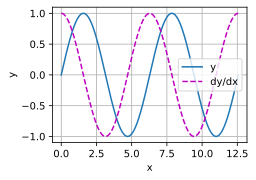

In [264]:
from d2l.torch import plot
import numpy as np

def f(x):
    return torch.sin(x)

x = torch.arange(0,4*torch.pi,0.01,requires_grad=True)
y = f(x)
xp = x.detach()
yp = y.detach()

y.sum().backward()
plot(xp,[yp,x.grad],'x','y',legend=['y','dy/dx'])